##Assignment Day 30 - Hyperparameter Tuning in Python <br>
### Chintia Hildayanti <br>
### Data Science 26 <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### 1. Load Dataset

In [ ]:
churn = pd.read_csv('/content/drive/MyDrive/churn_.csv')
churn.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


### About Dataset

`CustomerID`: A unique ID that identifies each customer.

`Gender`: The customer’s gender: Male, Female `(2 cat.)`

`SeniorCitizen`: Indicates if the customer is 65 or older: 1, 0

`Partner`: Indicate if the customer has a partner: Yes, No `(2 cat.)`

`Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. `(2 cat.)`

`tenure`: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

`Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. `(3 cat.)`

`PaperlessBilling`: Indicates if the customer has chosen paperless billing: Yes, No `(2 cat.)`

`PaymentMethod`: Indicates how the customer pays their bill: Bank transfer (automatic), Credit card (automatic),  Electronic check, Mailed Checck`(4 cat.)`

`MonthlyCharge`: Indicates the customer’s current total monthly charge for all their services from the company.

`TotalCharges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

`Churn`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. `(2 cat.)`

###2. Data Cleansing

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


In [ ]:
# check missing value

churn.isnull().sum()

,0
customerID,9
Gender,16
SeniorCitizen,12
Partner,16
Dependents,19
Tenure,17
Contract,13
PaperlessBilling,13
PaymentMethod,11
MonthlyCharges,10


In [ ]:
# total missing value

churn.isnull().sum().sum()

136

In [ ]:
churn.shape

(7046, 12)

In [ ]:
# missing value dibawah 5% jadi saya memilih untuk didrop saja

136/7046*100

1.9301731478853252

In [ ]:
# drop missing value

churn = churn.dropna()
churn

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7042,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
7043,8434-PNQZX,Female,0.0,No,No,42.0,Two year,Yes,Credit card (automatic),78.45,3373.40,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No


In [ ]:
# check duplikat value

churn.duplicated().sum()

13

In [ ]:
# drop duplikat value

churn = churn.drop_duplicates()
churn

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# drop kolom identifier

churn = churn.drop(columns=['customerID'])

###3. Feature Engineering

In [ ]:
# merubah kolom dengan 2 distinct values yes no

cats_1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

churn.loc[:, cats_1] = churn.loc[:, cats_1].replace({'No': 0, 'Yes': 1})
churn

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0.0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0.0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0.0,0,0,8.0,Month-to-month,1,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0.0,1,1,24.0,One year,1,Mailed check,84.80,1990.50,0
7028,Female,0.0,1,1,72.0,One year,1,Credit card (automatic),103.20,7362.90,0
7029,Female,0.0,1,1,11.0,Month-to-month,1,Electronic check,29.60,346.45,0
7030,Male,1.0,1,0,4.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
# merubah kolom gender dengan 2 distinct values male female

churn.loc[:, 'Gender'] = churn.loc[:, 'Gender'].replace({'Male': 0, 'Female': 1})
churn

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0,0.0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0.0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0.0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0.0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1
5,1,0.0,0,0,8.0,Month-to-month,1,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0.0,1,1,24.0,One year,1,Mailed check,84.80,1990.50,0
7028,1,0.0,1,1,72.0,One year,1,Credit card (automatic),103.20,7362.90,0
7029,1,0.0,1,1,11.0,Month-to-month,1,Electronic check,29.60,346.45,0
7030,0,1.0,1,0,4.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
# merubah type data string menjadi integer

cols_to_convert = ['Gender','SeniorCitizen','Partner', 'Dependents', 'PaperlessBilling', 'Churn']

churn[cols_to_convert] = churn[cols_to_convert].astype(int, errors='ignore')


In [ ]:
# Melakukan one-hot encoding pada kolom Contract dan PaymentMethod

cats_2 = ['Contract', 'PaymentMethod']

churn_encoded = pd.get_dummies(churn, columns=cats_2, dtype = int, drop_first=True)
churn_encoded

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,0,0,0,34.0,0,56.95,1889.50,0,1,0,0,0,1
2,0,0,0,0,2.0,1,53.85,108.15,1,0,0,0,0,1
3,0,0,0,0,45.0,0,42.30,1840.75,0,1,0,0,0,0
4,1,0,0,0,2.0,1,70.70,151.65,1,0,0,0,1,0
5,1,0,0,0,8.0,1,99.65,820.50,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24.0,1,84.80,1990.50,0,1,0,0,0,1
7028,1,0,1,1,72.0,1,103.20,7362.90,0,1,0,1,0,0
7029,1,0,1,1,11.0,1,29.60,346.45,0,0,0,0,1,0
7030,0,1,1,0,4.0,1,74.40,306.60,1,0,0,0,0,1


In [ ]:
churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 1 to 7031
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 6898 non-null   int64  
 1   SeniorCitizen                          6898 non-null   int64  
 2   Partner                                6898 non-null   int64  
 3   Dependents                             6898 non-null   int64  
 4   Tenure                                 6898 non-null   float64
 5   PaperlessBilling                       6898 non-null   int64  
 6   MonthlyCharges                         6898 non-null   float64
 7   TotalCharges                           6898 non-null   float64
 8   Churn                                  6898 non-null   int64  
 9   Contract_One year                      6898 non-null   int64  
 10  Contract_Two year                      6898 non-null   int64  
 11  PaymentMe

### 4. Split The Dataset

In [ ]:
# split dataset menjadi data training & testing

feature = churn_encoded.drop(columns= 'Churn')
target = churn_encoded['Churn']

ft_train, ft_test, tg_train, tg_test = train_test_split(feature, target, test_size=0.20, random_state=42)

### 5. Multicollinearity Handling

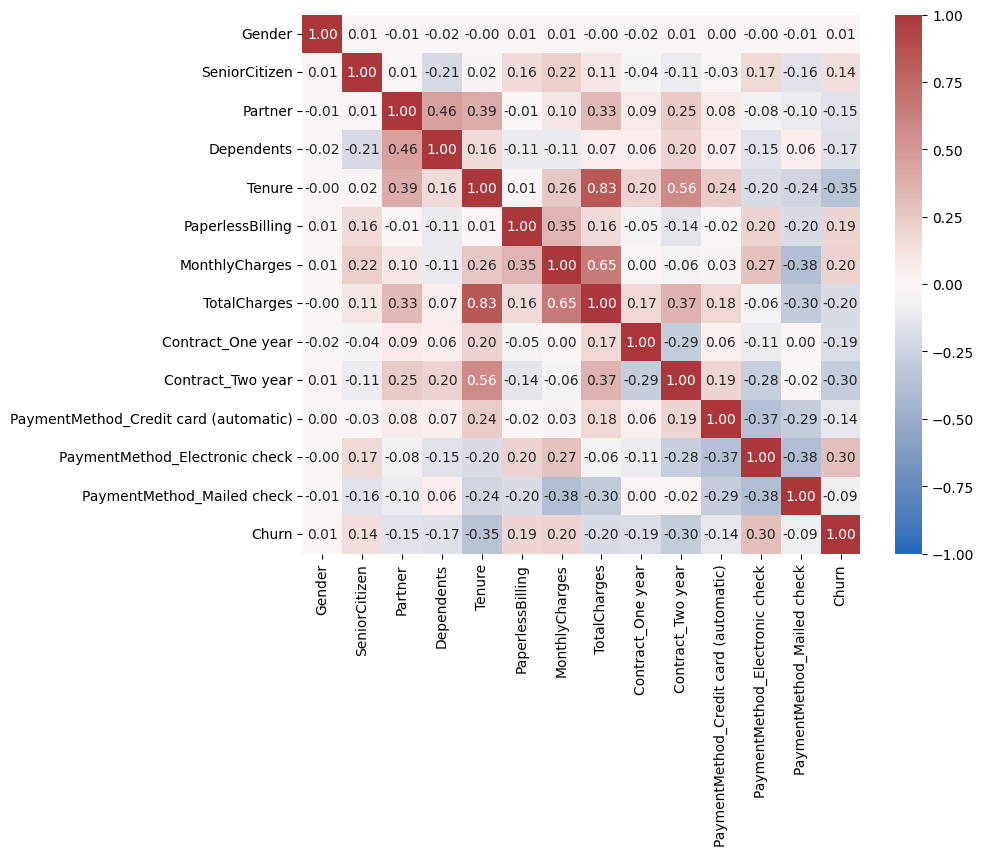

In [ ]:
# melihat korelasi antar fitur dengan heatmap correlation

churn_train = pd.concat([ft_train, tg_train], axis=1)
churn_corr = churn_train.corr()

plt.figure(figsize=(9,7))
sns.heatmap(churn_corr, annot=True, fmt = '.2f', cmap = 'vlag', vmin= -1, vmax = 1)
plt.show()

In [ ]:
# tenure dan total charges memiliki korelasi yang tinggi yaitu 0.83

# menghapus fitur total charges dari seluruh dataset
ft_train = ft_train.drop(columns = ['TotalCharges'])
ft_test = ft_test.drop(columns = ['TotalCharges'])

ft_train.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PaperlessBilling', 'MonthlyCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### 6. Training Random Forest Model

In [ ]:
# split the dataset

feature_rf = churn_encoded.drop(columns= 'Churn').to_numpy()
target_rf = churn_encoded[['Churn']].to_numpy()
target_rf = target_rf.reshape(len(target_rf),)

ft_train_rf, ft_test_rf, tg_train_rf, tg_test_rf = train_test_split(feature_rf, target_rf, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model

rf_clf = RandomForestClassifier(random_state=42)

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: saya menggunakan recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(ft_train_rf, tg_train_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

### 7. Choose metric for fitting the model <br>
saya memilih untuk menggunakan recall karena saya ingin model maksimal sensitivitasnya, misalkan ada sedikit saja peluang pelanggan akan churn, saya ingin model menangkap itu sebagai positif. jadi jangan sampai pelanggan yang berpotensi churn tapi terlepas dari model ini. karena cukup berbahaya apabila ada pelanggan berpotensi churn tapi malah tertangkap sebagai label negatif.

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.406969,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.399303,2
24,"{'max_depth': 5, 'n_estimators': 50}",0.395819,3
23,"{'max_depth': 5, 'n_estimators': 40}",0.387456,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.385366,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.367247,6
15,"{'max_depth': 4, 'n_estimators': 10}",0.363066,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.349129,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.347038,9
17,"{'max_depth': 4, 'n_estimators': 30}",0.339373,10


### 8. Model Evaluation

In [ ]:
# classification report training data

y_pred_train = rf_clf_gridcv.best_estimator_.predict(ft_train_rf)
print(classification_report(tg_train_rf, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4083
           1       0.70      0.46      0.55      1435

    accuracy                           0.81      5518
   macro avg       0.76      0.69      0.71      5518
weighted avg       0.80      0.81      0.79      5518



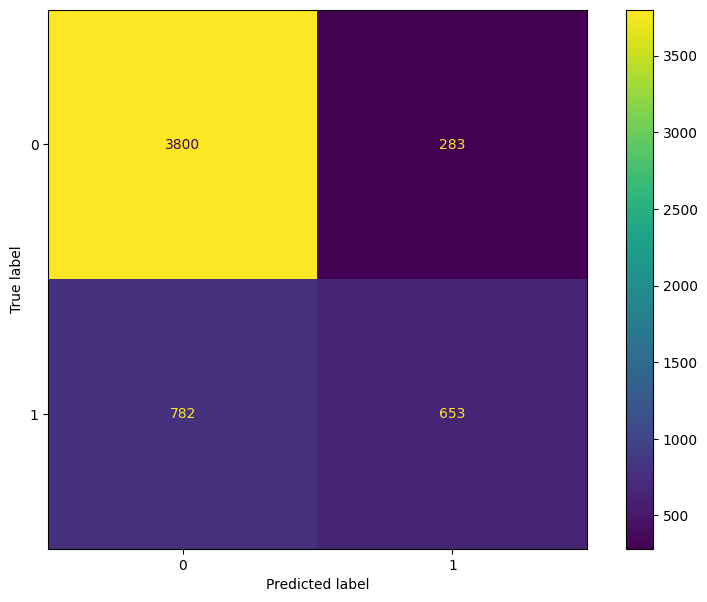

In [ ]:
# the confusion matrix training data

fig, ax = plt.subplots(figsize=(10,7))
y_pred_train = rf_clf_gridcv.best_estimator_.predict(ft_train_rf)

cm = confusion_matrix(tg_train_rf, y_pred_train, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Interpretasi : dari 5518 pelanggan , ada 782 pelanggan yang terdeteksi tidak churn tetapi pada kenyataanya dia churn (False Negative)

In [ ]:
# classification report testing data

y_pred_test = rf_clf_gridcv.best_estimator_.predict(ft_test_rf)
print(classification_report(tg_test_rf, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       990
           1       0.69      0.40      0.50       390

    accuracy                           0.78      1380
   macro avg       0.74      0.66      0.68      1380
weighted avg       0.77      0.78      0.76      1380



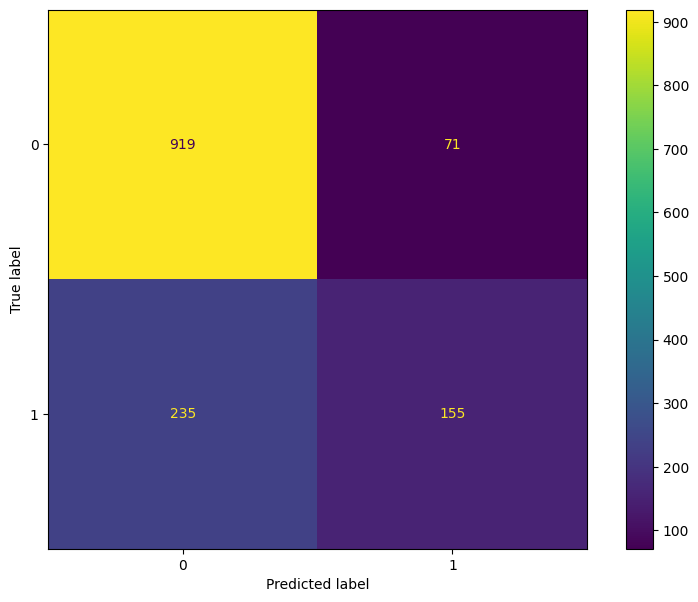

In [ ]:
# the confusion matrix testing data

fig, ax = plt.subplots(figsize=(10,7))
y_pred_test = rf_clf_gridcv.best_estimator_.predict(ft_test_rf)

cm = confusion_matrix(tg_test_rf, y_pred_test, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Interpretasi : dari 1380 pelanggan, ada 235 pelanggan yang terdeteksi tidak churn tetapi pada kenyataanya dia churn (False Negative)

Kesimpulan :
Secara keseluruhan, menunjukkan bahwa kombinasi max_depth sebesar 5 dan n_estimators sebanyak 10 memberikan performa terbaik dengan rata-rata recall pada test data sebesar 40.7% berarti model random forest mengalami underfitting pada dataset churn ini. ada perbedaan antara hasil rata-rata recall pada train dan test data, rata-rata recall pada train data adalah 46%